In [1]:
import os 
import pandas as pd

from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file
from collections import Counter
import seaborn as sn
import random
import matplotlib.pyplot as plt

import numpy as np

In [2]:
lot_df = pd.read_csv('lottery_data_results.csv', index_col=False)
ny_df = pd.read_csv('ny_data_results.csv', index_col=False)
mar_df = pd.read_csv('mar_data_results.csv', index_col=False)
youngest_df = pd.read_csv('youngest_data_results.csv', index_col=False)
sickest_df = pd.read_csv('sickest_data_results.csv', index_col=False)
max_lives_df = pd.read_csv('max_lives_data_results.csv', index_col=False)

### Hispanic

In [3]:
def percent_diff(row):
    return ( (row.death_counts - row.lag_counts) / row.death_counts  ) * 100

def absolute_deviation(median, row):
    return abs(median - row.difference)
def modified_zscore(median, row):
    return (0.6745 * (row.difference - median)) / row.MAD

In [4]:
all_df_list = []

#### Lottery

In [5]:
race_var  = 'Asian'
hispanic_df = lot_df[lot_df['race'] == race_var]
hispanic_df = hispanic_df[hispanic_df['threshold'] != 1.1]
hispanic_df.sort_values(by=['threshold'], inplace=True)
hispanic_df['lag_counts'] = hispanic_df['death_counts'].shift(-1)
hispanic_df['difference'] = hispanic_df['death_counts'] - hispanic_df['lag_counts']
hispanic_df['percent_difference'] = hispanic_df.apply(lambda row: percent_diff(row), axis=1)
hispanic_df['type'] = 'Lottery'


med = hispanic_df['difference'].median()
mad_lambda = lambda median: lambda row: absolute_deviation(median, row)
med_func = mad_lambda(med)
hispanic_df['absolute_deviation'] = hispanic_df.apply(lambda row: med_func(row), axis=1)
hispanic_df['MAD'] = hispanic_df['absolute_deviation'].median()
mod_z_lambda = lambda median: lambda row: modified_zscore(median, row)
mod_func = mod_z_lambda(med)
hispanic_df['modified_z_score'] = hispanic_df.apply(lambda row: mod_func(row), axis=1)
hispanic_df['outlier'] = hispanic_df.apply(lambda row: 1 if row.modified_z_score >= 3.5 else 0, axis=1)


all_df_list.append(hispanic_df)
hispanic_df

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type,lag_counts,difference,percent_difference,type,absolute_deviation,MAD,modified_z_score,outlier
9,Asian,7.000,0.0,487.000,100.000000,NaN,6.004,0.996,14.228571,Lottery,0.0665,0.0705,0.636230,0
16,Asian,6.004,0.1,437.899,85.771429,NaN,5.050,0.954,15.889407,Lottery,0.0245,0.0705,0.234401,0
26,Asian,5.050,0.2,400.117,72.142857,NaN,4.046,1.004,19.881188,Lottery,0.0745,0.0705,0.712770,0
33,Asian,4.046,0.3,360.875,57.800000,NaN,3.076,0.970,23.974296,Lottery,0.0405,0.0705,0.387479,0
45,Asian,3.076,0.4,318.644,43.942857,NaN,3.063,0.013,0.422627,Lottery,0.9165,0.0705,-8.768500,0
52,Asian,3.063,0.5,272.878,43.757143,NaN,2.117,0.946,30.884754,Lottery,0.0165,0.0705,0.157862,0
59,Asian,2.117,0.6,222.977,30.242857,NaN,1.204,0.913,43.127067,Lottery,0.0165,0.0705,-0.157862,0
69,Asian,1.204,0.7,177.051,17.200000,NaN,1.240,-0.036,-2.990033,Lottery,0.9655,0.0705,-9.237301,0
76,Asian,1.240,0.8,124.517,17.714286,NaN,1.109,0.131,10.564516,Lottery,0.7985,0.0705,-7.639550,0
79,Asian,1.109,0.9,74.190,15.842857,NaN,1.083,0.026,2.344454,Lottery,0.9035,0.0705,-8.644124,0


#### New York

In [6]:
hispanic_df = ny_df[ny_df['race'] == race_var]
hispanic_df = hispanic_df[hispanic_df['threshold'] != 1.1]
hispanic_df.sort_values(by=['threshold'], inplace=True)
hispanic_df['lag_counts'] = hispanic_df['death_counts'].shift(-1)
hispanic_df['difference'] = hispanic_df['death_counts'] - hispanic_df['lag_counts']
hispanic_df['percent_difference'] = hispanic_df.apply(lambda row: percent_diff(row), axis=1)
hispanic_df['type'] = 'New York'

med = hispanic_df['difference'].median()
mad_lambda = lambda median: lambda row: absolute_deviation(median, row)
med_func = mad_lambda(med)
hispanic_df['absolute_deviation'] = hispanic_df.apply(lambda row: med_func(row), axis=1)
hispanic_df['MAD'] = hispanic_df['absolute_deviation'].median()
mod_z_lambda = lambda median: lambda row: modified_zscore(median, row)
mod_func = mod_z_lambda(med)
hispanic_df['modified_z_score'] = hispanic_df.apply(lambda row: mod_func(row), axis=1)
hispanic_df['outlier'] = hispanic_df.apply(lambda row: 1 if row.modified_z_score >= 3.5 else 0, axis=1)


all_df_list.append(hispanic_df)
hispanic_df

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type,lag_counts,difference,percent_difference,type,absolute_deviation,MAD,modified_z_score,outlier
11,Asian,7.000,0.0,487.000,100.000000,NaN,5.323,1.677,23.957143,New York,1.025,0.4665,1.482020,0
20,Asian,5.323,0.1,433.050,76.042857,NaN,4.615,0.708,13.300770,New York,0.056,0.4665,0.080969,0
26,Asian,4.615,0.2,378.396,65.928571,NaN,4.019,0.596,12.914410,New York,0.056,0.4665,-0.080969,0
36,Asian,4.019,0.3,324.595,57.414286,NaN,3.248,0.771,19.183877,New York,0.119,0.4665,0.172059,0
44,Asian,3.248,0.4,279.014,46.400000,NaN,2.472,0.776,23.891626,New York,0.124,0.4665,0.179288,0
46,Asian,2.472,0.5,233.655,35.314286,NaN,2.363,0.109,4.409385,New York,0.543,0.4665,-0.785109,0
57,Asian,2.363,0.6,191.496,33.757143,NaN,1.303,1.060,44.858231,New York,0.408,0.4665,0.589916,0
68,Asian,1.303,0.7,149.028,18.614286,NaN,1.176,0.127,9.746738,New York,0.525,0.4665,-0.759084,0
75,Asian,1.176,0.8,104.948,16.800000,NaN,1.128,0.048,4.081633,New York,0.604,0.4665,-0.873308,0
83,Asian,1.128,0.9,67.037,16.114286,NaN,1.106,0.022,1.950355,New York,0.630,0.4665,-0.910900,0


#### Maryland

In [7]:
hispanic_df = mar_df[mar_df['race'] == race_var]
hispanic_df = hispanic_df[hispanic_df['threshold'] != 1.1]
hispanic_df.sort_values(by=['threshold'], inplace=True)
hispanic_df['lag_counts'] = hispanic_df['death_counts'].shift(-1)
hispanic_df['difference'] = hispanic_df['death_counts'] - hispanic_df['lag_counts']
hispanic_df['percent_difference'] = hispanic_df.apply(lambda row: percent_diff(row), axis=1)
hispanic_df['type'] = 'Maryland'

med = hispanic_df['difference'].median()
mad_lambda = lambda median: lambda row: absolute_deviation(median, row)
med_func = mad_lambda(med)
hispanic_df['absolute_deviation'] = hispanic_df.apply(lambda row: med_func(row), axis=1)
hispanic_df['MAD'] = hispanic_df['absolute_deviation'].median()
mod_z_lambda = lambda median: lambda row: modified_zscore(median, row)
mod_func = mod_z_lambda(med)
hispanic_df['modified_z_score'] = hispanic_df.apply(lambda row: mod_func(row), axis=1)
hispanic_df['outlier'] = hispanic_df.apply(lambda row: 1 if row.modified_z_score >= 3.5 else 0, axis=1)


all_df_list.append(hispanic_df)
hispanic_df

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type,lag_counts,difference,percent_difference,type,absolute_deviation,MAD,modified_z_score,outlier
10,Asian,7.000,0.0,487.000,100.000000,NaN,5.009,1.991,28.442857,Maryland,1.973,0.0305,43.632410,1
19,Asian,5.009,0.1,432.379,71.557143,NaN,5.016,-0.007,-0.139748,Maryland,0.025,0.0305,-0.552869,0
22,Asian,5.016,0.2,379.791,71.657143,NaN,4.019,0.997,19.876396,Maryland,0.979,0.0305,21.650344,1
30,Asian,4.019,0.3,330.041,57.414286,NaN,4.019,0.000,0.000000,Maryland,0.018,0.0305,-0.398066,0
45,Asian,4.019,0.4,288.334,57.414286,NaN,4.019,0.000,0.000000,Maryland,0.018,0.0305,-0.398066,0
52,Asian,4.019,0.5,243.638,57.414286,NaN,4.018,0.001,0.024882,Maryland,0.017,0.0305,-0.375951,0
58,Asian,4.018,0.6,208.782,57.400000,NaN,1.166,2.852,70.980587,Maryland,2.834,0.0305,62.673213,1
69,Asian,1.166,0.7,157.018,16.657143,NaN,1.212,-0.046,-3.945111,Maryland,0.064,0.0305,-1.415344,0
76,Asian,1.212,0.8,106.540,17.314286,NaN,1.158,0.054,4.455446,Maryland,0.036,0.0305,0.796131,0
81,Asian,1.158,0.9,72.091,16.542857,NaN,1.123,0.035,3.022453,Maryland,0.017,0.0305,0.375951,0


#### Youngest

In [8]:
hispanic_df = youngest_df[youngest_df['race'] == race_var]
hispanic_df = hispanic_df[hispanic_df['threshold'] != 1.1]
hispanic_df.sort_values(by=['threshold'], inplace=True)
hispanic_df['lag_counts'] = hispanic_df['death_counts'].shift(-1)
hispanic_df['difference'] = hispanic_df['death_counts'] - hispanic_df['lag_counts']
hispanic_df['percent_difference'] = hispanic_df.apply(lambda row: percent_diff(row), axis=1)
hispanic_df['type'] = 'Youngest First'

med = hispanic_df['difference'].median()
mad_lambda = lambda median: lambda row: absolute_deviation(median, row)
med_func = mad_lambda(med)
hispanic_df['absolute_deviation'] = hispanic_df.apply(lambda row: med_func(row), axis=1)
hispanic_df['MAD'] = hispanic_df['absolute_deviation'].median()
mod_z_lambda = lambda median: lambda row: modified_zscore(median, row)
mod_func = mod_z_lambda(med)
hispanic_df['modified_z_score'] = hispanic_df.apply(lambda row: mod_func(row), axis=1)
hispanic_df['outlier'] = hispanic_df.apply(lambda row: 1 if row.modified_z_score >= 3.5 else 0, axis=1)


all_df_list.append(hispanic_df)
hispanic_df

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type,lag_counts,difference,percent_difference,type,absolute_deviation,MAD,modified_z_score,outlier
8,Asian,7.000,0.0,487.000,100.000000,NaN,6.010,0.990,14.142857,Youngest First,0.481,0.4915,0.660091,0
21,Asian,6.010,0.1,449.971,85.857143,NaN,6.003,0.007,0.116473,Youngest First,0.502,0.4915,-0.688909,0
28,Asian,6.003,0.2,406.845,85.757143,NaN,6.009,-0.006,-0.099950,Youngest First,0.515,0.4915,-0.706750,0
33,Asian,6.009,0.3,363.732,85.842857,NaN,5.058,0.951,15.826261,Youngest First,0.442,0.4915,0.606570,0
44,Asian,5.058,0.4,326.387,72.257143,NaN,5.059,-0.001,-0.019771,Youngest First,0.510,0.4915,-0.699888,0
51,Asian,5.059,0.5,282.179,72.271429,NaN,3.074,1.985,39.237003,Youngest First,1.476,0.4915,2.025558,0
59,Asian,3.074,0.6,242.113,43.914286,NaN,2.123,0.951,30.936890,Youngest First,0.442,0.4915,0.606570,0
67,Asian,2.123,0.7,193.757,30.328571,NaN,1.199,0.924,43.523316,Youngest First,0.415,0.4915,0.569517,0
76,Asian,1.199,0.8,141.023,17.128571,NaN,1.211,-0.012,-1.000834,Youngest First,0.521,0.4915,-0.714984,0
84,Asian,1.211,0.9,90.302,17.300000,NaN,1.117,0.094,7.762180,Youngest First,0.415,0.4915,-0.569517,0


#### Max Life Years

In [9]:
hispanic_df = max_lives_df[max_lives_df['race'] == race_var]
hispanic_df = hispanic_df[hispanic_df['threshold'] != 1.1]
hispanic_df.sort_values(by=['threshold'], inplace=True)
hispanic_df['lag_counts'] = hispanic_df['death_counts'].shift(-1)
hispanic_df['difference'] = hispanic_df['death_counts'] - hispanic_df['lag_counts']
hispanic_df['percent_difference'] = hispanic_df.apply(lambda row: percent_diff(row), axis=1)
hispanic_df['type'] = 'Max Life Years'

med = hispanic_df['difference'].median()
mad_lambda = lambda median: lambda row: absolute_deviation(median, row)
med_func = mad_lambda(med)
hispanic_df['absolute_deviation'] = hispanic_df.apply(lambda row: med_func(row), axis=1)
hispanic_df['MAD'] = hispanic_df['absolute_deviation'].median()
mod_z_lambda = lambda median: lambda row: modified_zscore(median, row)
mod_func = mod_z_lambda(med)
hispanic_df['modified_z_score'] = hispanic_df.apply(lambda row: mod_func(row), axis=1)
hispanic_df['outlier'] = hispanic_df.apply(lambda row: 1 if row.modified_z_score >= 3.5 else 0, axis=1)


all_df_list.append(hispanic_df)
hispanic_df

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type,lag_counts,difference,percent_difference,type,absolute_deviation,MAD,modified_z_score,outlier
7,Asian,7.000,0.0,487.000,100.000000,NaN,6.002,0.998,14.257143,Max Life Years,0.500,0.4915,0.686165,0
17,Asian,6.002,0.1,432.386,85.742857,NaN,4.028,1.974,32.889037,Max Life Years,1.476,0.4915,2.025558,0
28,Asian,4.028,0.2,382.825,57.542857,NaN,4.014,0.014,0.347567,Max Life Years,0.484,0.4915,-0.664208,0
36,Asian,4.014,0.3,330.027,57.342857,NaN,4.016,-0.002,-0.049826,Max Life Years,0.500,0.4915,-0.686165,0
42,Asian,4.016,0.4,288.270,57.371429,NaN,3.063,0.953,23.730080,Max Life Years,0.455,0.4915,0.624410,0
48,Asian,3.063,0.5,252.318,43.757143,NaN,3.064,-0.001,-0.032648,Max Life Years,0.499,0.4915,-0.684792,0
59,Asian,3.064,0.6,212.753,43.771429,NaN,2.126,0.938,30.613577,Max Life Years,0.440,0.4915,0.603825,0
68,Asian,2.126,0.7,162.949,30.371429,NaN,1.160,0.966,45.437441,Max Life Years,0.468,0.4915,0.642250,0
75,Asian,1.160,0.8,108.336,16.571429,NaN,1.176,-0.016,-1.379310,Max Life Years,0.514,0.4915,-0.705377,0
82,Asian,1.176,0.9,72.093,16.800000,NaN,1.118,0.058,4.931973,Max Life Years,0.440,0.4915,-0.603825,0


#### Sickest First

In [10]:
hispanic_df = sickest_df[sickest_df['race'] == race_var]
hispanic_df = hispanic_df[hispanic_df['threshold'] != 1.1]
hispanic_df.sort_values(by=['threshold'], inplace=True)
hispanic_df['lag_counts'] = hispanic_df['death_counts'].shift(-1)
hispanic_df['difference'] = hispanic_df['death_counts'] - hispanic_df['lag_counts']
hispanic_df['percent_difference'] = hispanic_df.apply(lambda row: percent_diff(row), axis=1)
hispanic_df['type'] = 'Sickest First'


med = hispanic_df['difference'].median()
mad_lambda = lambda median: lambda row: absolute_deviation(median, row)
med_func = mad_lambda(med)
hispanic_df['absolute_deviation'] = hispanic_df.apply(lambda row: med_func(row), axis=1)
hispanic_df['MAD'] = hispanic_df['absolute_deviation'].median()
mod_z_lambda = lambda median: lambda row: modified_zscore(median, row)
mod_func = mod_z_lambda(med)
hispanic_df['modified_z_score'] = hispanic_df.apply(lambda row: mod_func(row), axis=1)
hispanic_df['outlier'] = hispanic_df.apply(lambda row: 1 if row.modified_z_score >= 3.5 else 0, axis=1)


all_df_list.append(hispanic_df)
hispanic_df

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type,lag_counts,difference,percent_difference,type,absolute_deviation,MAD,modified_z_score,outlier
12,Asian,7.000,0.0,487.000,100.000000,NaN,7.000,0.000,0.000000,Sickest First,0.456,0.468,-0.657205,0
18,Asian,7.000,0.1,454.482,100.000000,NaN,6.101,0.899,12.842857,Sickest First,0.443,0.468,0.638469,0
29,Asian,6.101,0.2,413.206,87.157143,NaN,6.115,-0.014,-0.229471,Sickest First,0.470,0.468,-0.677382,0
37,Asian,6.115,0.3,369.298,87.357143,NaN,5.145,0.970,15.862633,Sickest First,0.514,0.468,0.740797,0
44,Asian,5.145,0.4,319.314,73.500000,NaN,4.208,0.937,18.211856,Sickest First,0.481,0.468,0.693236,0
50,Asian,4.208,0.5,280.011,60.114286,NaN,3.232,0.976,23.193916,Sickest First,0.520,0.468,0.749444,0
60,Asian,3.232,0.6,234.317,46.171429,NaN,3.242,-0.010,-0.309406,Sickest First,0.466,0.468,-0.671618,0
65,Asian,3.242,0.7,190.084,46.314286,NaN,3.232,0.010,0.308452,Sickest First,0.446,0.468,-0.642793,0
76,Asian,3.232,0.8,142.671,46.171429,NaN,1.109,2.123,65.686881,Sickest First,1.667,0.468,2.402546,0
84,Asian,1.109,0.9,91.131,15.842857,NaN,1.096,0.013,1.172227,Sickest First,0.443,0.468,-0.638469,0


/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Difference Plot For White Patients')

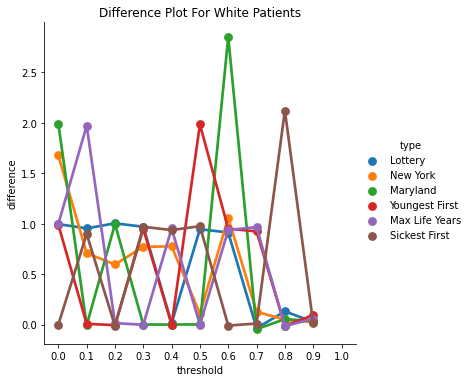

In [11]:
all_df = pd.concat(all_df_list)
type_labels = all_df['type'].unique()
sn_plot = sn.factorplot(x='threshold', y='difference', 
                        hue_order = type_labels, hue='type', data=all_df)
plt.title('Difference Plot For White Patients')

In [12]:
all_df[all_df['type'] == 'Lottery']

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type,lag_counts,difference,percent_difference,type,absolute_deviation,MAD,modified_z_score,outlier
9,Asian,7.000,0.0,487.000,100.000000,NaN,6.004,0.996,14.228571,Lottery,0.0665,0.0705,0.636230,0
16,Asian,6.004,0.1,437.899,85.771429,NaN,5.050,0.954,15.889407,Lottery,0.0245,0.0705,0.234401,0
26,Asian,5.050,0.2,400.117,72.142857,NaN,4.046,1.004,19.881188,Lottery,0.0745,0.0705,0.712770,0
33,Asian,4.046,0.3,360.875,57.800000,NaN,3.076,0.970,23.974296,Lottery,0.0405,0.0705,0.387479,0
45,Asian,3.076,0.4,318.644,43.942857,NaN,3.063,0.013,0.422627,Lottery,0.9165,0.0705,-8.768500,0
52,Asian,3.063,0.5,272.878,43.757143,NaN,2.117,0.946,30.884754,Lottery,0.0165,0.0705,0.157862,0
59,Asian,2.117,0.6,222.977,30.242857,NaN,1.204,0.913,43.127067,Lottery,0.0165,0.0705,-0.157862,0
69,Asian,1.204,0.7,177.051,17.200000,NaN,1.240,-0.036,-2.990033,Lottery,0.9655,0.0705,-9.237301,0
76,Asian,1.240,0.8,124.517,17.714286,NaN,1.109,0.131,10.564516,Lottery,0.7985,0.0705,-7.639550,0
79,Asian,1.109,0.9,74.190,15.842857,NaN,1.083,0.026,2.344454,Lottery,0.9035,0.0705,-8.644124,0


Text(0.5, 1.0, 'Difference Plot For White Patients Lottery')

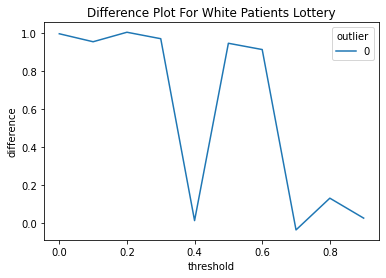

In [13]:
type_labels = all_df['type'].unique()
sn_plot = sn.lineplot(x='threshold', y='difference', 
                        hue='outlier', 
                      data=all_df[all_df['type'] == 'Lottery'])
plt.title('Difference Plot For White Patients Lottery')

Text(0.5, 1.0, 'Difference Plot For White Patients New York')

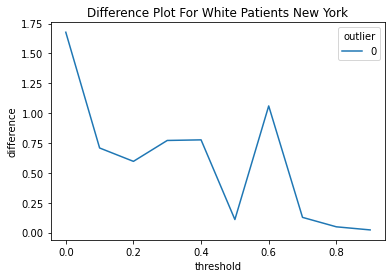

In [14]:
sn_plot = sn.lineplot(x='threshold', y='difference', 
                        hue='outlier', 
                      data=all_df[all_df['type'] == 'New York'])
plt.title('Difference Plot For White Patients New York')

Text(0.5, 1.0, 'Difference Plot For White Patients Maryland')

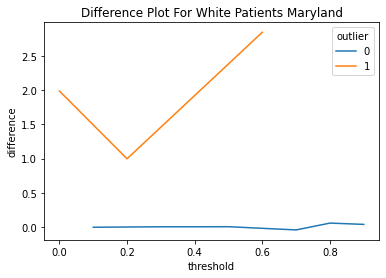

In [15]:
sn_plot = sn.lineplot(x='threshold', y='difference', 
                        hue='outlier', 
                      data=all_df[all_df['type'] == 'Maryland'])
plt.title('Difference Plot For White Patients Maryland')

In [19]:
all_df[all_df['type'] == 'Maryland']

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type,lag_counts,difference,percent_difference,type,absolute_deviation,MAD,modified_z_score,outlier
10,Asian,7.000,0.0,487.000,100.000000,NaN,5.009,1.991,28.442857,Maryland,1.973,0.0305,43.632410,1
19,Asian,5.009,0.1,432.379,71.557143,NaN,5.016,-0.007,-0.139748,Maryland,0.025,0.0305,-0.552869,0
22,Asian,5.016,0.2,379.791,71.657143,NaN,4.019,0.997,19.876396,Maryland,0.979,0.0305,21.650344,1
30,Asian,4.019,0.3,330.041,57.414286,NaN,4.019,0.000,0.000000,Maryland,0.018,0.0305,-0.398066,0
45,Asian,4.019,0.4,288.334,57.414286,NaN,4.019,0.000,0.000000,Maryland,0.018,0.0305,-0.398066,0
52,Asian,4.019,0.5,243.638,57.414286,NaN,4.018,0.001,0.024882,Maryland,0.017,0.0305,-0.375951,0
58,Asian,4.018,0.6,208.782,57.400000,NaN,1.166,2.852,70.980587,Maryland,2.834,0.0305,62.673213,1
69,Asian,1.166,0.7,157.018,16.657143,NaN,1.212,-0.046,-3.945111,Maryland,0.064,0.0305,-1.415344,0
76,Asian,1.212,0.8,106.540,17.314286,NaN,1.158,0.054,4.455446,Maryland,0.036,0.0305,0.796131,0
81,Asian,1.158,0.9,72.091,16.542857,NaN,1.123,0.035,3.022453,Maryland,0.017,0.0305,0.375951,0


/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='difference', ylabel='Density'>

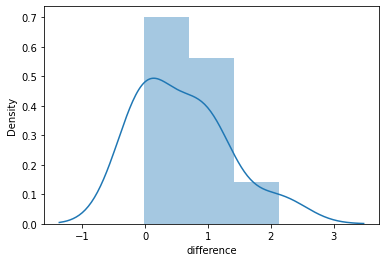

In [20]:
sn.distplot(all_df[all_df['type'] == 'Sickest First']['difference'])

Text(0.5, 1.0, 'Difference Plot For White Patients Youngest First')

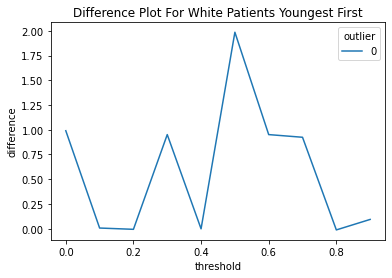

In [16]:
sn_plot = sn.lineplot(x='threshold', y='difference', 
                        hue='outlier', 
                      data=all_df[all_df['type'] == 'Youngest First'])
plt.title('Difference Plot For White Patients Youngest First')

Text(0.5, 1.0, 'Difference Plot For White Patients Max Life Years')

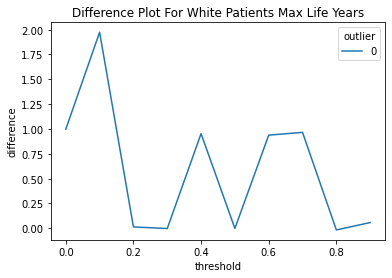

In [17]:
sn_plot = sn.lineplot(x='threshold', y='difference', 
                        hue='outlier', 
                      data=all_df[all_df['type'] == 'Max Life Years'])
plt.title('Difference Plot For White Patients Max Life Years')

Text(0.5, 1.0, 'Difference Plot For White Patients Sickest First')

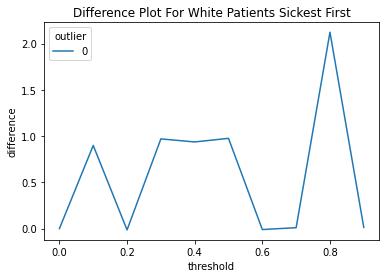

In [18]:
sn_plot = sn.lineplot(x='threshold', y='difference', 
                        hue='outlier', 
                      data=all_df[all_df['type'] == 'Sickest First'])
plt.title('Difference Plot For White Patients Sickest First')